In [1]:
import os
import sys
import pickle

import warnings
warnings.simplefilter('ignore')


import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import roc_curve, roc_auc_score

%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib.patches import Patch
from matplotlib import rc_context

In [3]:
from zedstat import zedstat

In [4]:
F = "TASK_PLOTS"
os.makedirs(F, exist_ok = True)

In [5]:
PLOTS_FOLDER = f"{F}/MAIN_PANELS"
os.makedirs(PLOTS_FOLDER, exist_ok = True)

## **---------------------------**

In [6]:
from matplotlib.ticker import MaxNLocator
GLOBAL_FIGSIZE = 4
LABEL_SIZE = 13

GLOBAL_FONTSIZE = 22
plt.style.use('fivethirtyeight')

## **---------------------------**

# **Task 1 - In-Span Restoration**

In [7]:
TASK_FOLDER = "TASK_ASSETS/TASK1"
TASK_PLOTS_FOLDER = f"{F}/TASK1"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

# **QDistances**

In [8]:
qdistances = pd.read_csv(f"{TASK_FOLDER}/QDISTANCES.csv")
qdistances.head(2)

,patient,MASKING_FRACTION,QSTEPS_PER_MASKED_COL,orig_to_masked,orig_to_restored,restored_masked_dist_ratio
0,0,0.35,100,0.002696,0.000174,0.064419
1,1,0.35,100,0.003078,0.000113,0.036850


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


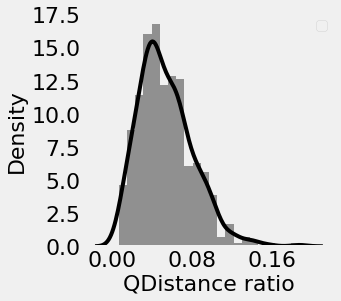

In [9]:
plt.figure(figsize = (GLOBAL_FIGSIZE, GLOBAL_FIGSIZE))

sns.distplot(
    qdistances['restored_masked_dist_ratio'], 
    color = 'k'
)

plt.xlabel("QDistance ratio", 
           fontsize = GLOBAL_FONTSIZE)
plt.ylabel("Density", 
           fontsize = GLOBAL_FONTSIZE)
#plt.title(f"Number of ICD10 codes per patient")

plt.xticks([0, 0.05, 0.1, 0.15, 0.2], fontsize=GLOBAL_FONTSIZE)
plt.yticks(fontsize=GLOBAL_FONTSIZE)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=4))  # maximum 5 ticks on x-axis

plt.grid()
plt.legend()
#plt.title(f"Distances: (original<->restored)/(original<->masked)")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/QDISTANCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

# **Task 2 - Span Extrapolation**

In [10]:
TASK_FOLDER = "TASK_ASSETS/TASK2"
TASK_PLOTS_FOLDER = f"{F}/TASK2"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

### **QDistances**

In [11]:
qdistances = pd.read_csv(f"{TASK_FOLDER}/QDISTANCES.csv")
qdistances.head(4)

,patient,QSTEPS_PER_MASKED_COL,orig_to_masked,orig_to_restored,restored_masked_dist_ratio
0,0,100,0.002591,0.000094,0.036099
1,1,100,0.003087,0.000172,0.055740
2,2,100,0.002505,0.000098,0.038961
3,3,100,0.003466,0.000370,0.106723


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


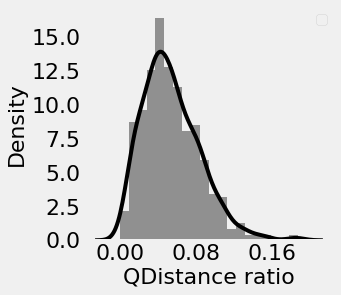

In [12]:
plt.figure(figsize = (GLOBAL_FIGSIZE, GLOBAL_FIGSIZE))

sns.distplot(
    qdistances['restored_masked_dist_ratio'], 
    color = 'k'
)

plt.xlabel("QDistance ratio", 
           fontsize = GLOBAL_FONTSIZE)
plt.ylabel("Density", 
           fontsize = GLOBAL_FONTSIZE)
#plt.title(f"Number of ICD10 codes per patient")

plt.xticks([0, 0.05, 0.1, 0.15, 0.2], fontsize=GLOBAL_FONTSIZE)
plt.yticks(fontsize=GLOBAL_FONTSIZE)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=4))  # maximum 5 ticks on x-axis

plt.grid()
plt.legend()
#plt.title(f"Distances: (original<->restored)/(original<->masked)")

plt.savefig(
    f"{TASK_PLOTS_FOLDER}/QDISTANCES.png", 
    bbox_inches = "tight", dpi = 300
)
plt.show()

# **ANTIFIBROTIC CURVES**

In [13]:
TASK_FOLDER = "TASK_ASSETS/TASK3"
TASK_PLOTS_FOLDER = f"{F}/TASK3"
os.makedirs(TASK_PLOTS_FOLDER, exist_ok = True)

In [14]:
with open(
    f"{TASK_FOLDER}/BASE_CURVES.pkl", 
    "rb") as f:
    CURVES = pickle.load(f)

CURVE_CONCATENATION = pd.concat([
    CURVE[['fpr', 'tpr', 'threshold']] for CURVE in CURVES.values()
])

CURVE_CONCATENATION = pd.concat([CURVE[['fpr', 'tpr', 'threshold']] for CURVE in CURVES.values()])

In [15]:
PATIENT_NUMBERS = {
    "total": 1580,
    "positive": 1544
}

zt=zedstat.processRoc(
    df = CURVE_CONCATENATION,
    order=3,
    total_samples = PATIENT_NUMBERS['total'],
    positive_samples = PATIENT_NUMBERS['positive'],
    alpha=0.05,
    prevalence = 0.75
)

zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

df_=zt.get()
df_u=zt.df_lim['U']
df_l=zt.df_lim['L']
df_=df_.join(df_u,rsuffix='_upper').join(df_l,rsuffix='_lower')
SUPER_CURVE = df_.reset_index()
zt.df = SUPER_CURVE

ZAUCS = (
    np.trapz(
        SUPER_CURVE['tpr'], SUPER_CURVE['fpr']
    ),
    np.trapz(
        SUPER_CURVE['tpr_upper'], SUPER_CURVE['fpr']
    ),
    np.trapz(
        SUPER_CURVE['tpr_lower'], SUPER_CURVE['fpr']
    ),
)
ZAUCS

(0.7769543393782383, 0.792938521242865, 0.7609701575136116)

# **ROC**

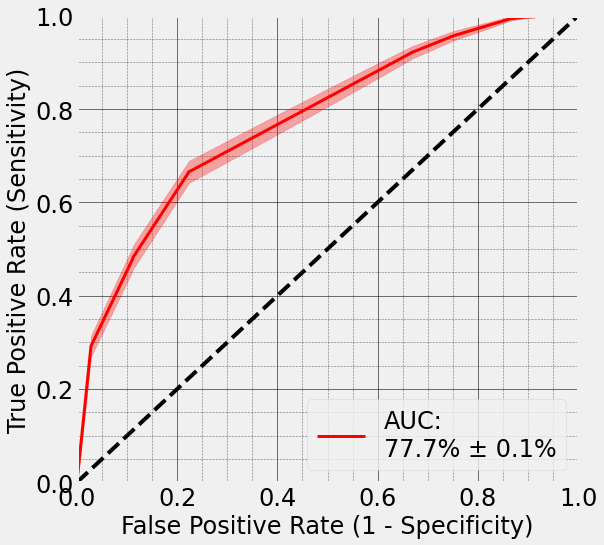

In [16]:
GLOBAL_FIG_SIZE = 8
LABEL_SIZE = 20
CB_ALPHA = 0.33
XLIM = [
    0.0, 1.0
]
YLIM = [0.0, 1.0]

GLOBAL_FONTSIZE = 24

ROC_COLOR = "r"

# ~ Initialize ROC curve ~~~~~~~~~~~~~~~~~
fig = plt.figure(figsize = (GLOBAL_FIG_SIZE, GLOBAL_FIG_SIZE))
ax = fig.add_subplot(111)
plt.minorticks_on()
# Set grid to use minor tick locations.
ax.grid(which='major', linestyle='-', linewidth='0.55', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.55', color='black')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# PLOT NATIONAL
ROC = SUPER_CURVE
AUC, AUC_U, AUC_L = ZAUCS
AUC_STRING = f"{AUC*100:.1f}% ± 0.1%"
ax.plot(ROC.fpr,
        ROC.tpr,
        label = f"AUC:\n{AUC_STRING}",
        linewidth = 3,
        color = ROC_COLOR)

plt.fill_between(x = ROC.fpr,
                 y1 = ROC.tpr_upper,
                 y2 = ROC.tpr_lower,
                 color = ROC_COLOR,
                 alpha = CB_ALPHA)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Finish the plot
plt.plot([0, 1], [0, 1], 'k--')  # random predictions line
plt.xlim(XLIM)
plt.ylim(YLIM)
plt.xticks(fontsize = GLOBAL_FONTSIZE)
plt.yticks(fontsize = GLOBAL_FONTSIZE)
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = GLOBAL_FONTSIZE)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = GLOBAL_FONTSIZE)
plt.legend(loc = "lower right", fontsize = GLOBAL_FONTSIZE)

plt.savefig(f"{TASK_PLOTS_FOLDER}/ROC.png",
            bbox_inches = "tight", dpi = 300)

# **LR**

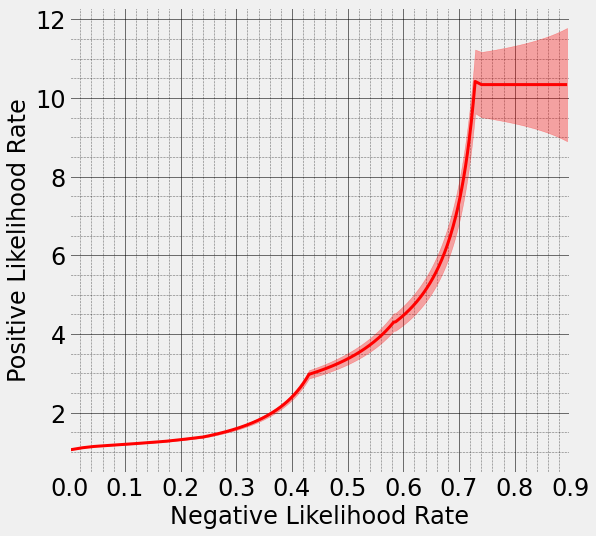

In [17]:
# ~ Initialize ROC curve ~~~~~~~~~~~~~~~~~
LRPLOT_XLIM = [0,0.9]

fig = plt.figure(figsize = (GLOBAL_FIG_SIZE, GLOBAL_FIG_SIZE))
ax = fig.add_subplot(111)
plt.xlim(LRPLOT_XLIM)
plt.minorticks_on()
# Set grid to use minor tick locations.
ax.grid(which='major', linestyle='-', linewidth='0.55', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.55', color='black')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# PLOT NATIONAL
ROC = SUPER_CURVE
ROC = ROC[ROC['LR-'] <= LRPLOT_XLIM[1]]
ax.plot(ROC['LR-'],
        (ROC['LR+_upper']+ROC['LR+_lower'])/2, # LR+ itself is not smoothened for some reason
        label = f"AUC:\n{AUC_STRING}",
        linewidth = 3,
        color = ROC_COLOR)

plt.fill_between(x = ROC['LR-'],
                 y1 = ROC['LR+_upper'],
                 y2 = ROC['LR+_lower'],
                 color = ROC_COLOR,
                 alpha = CB_ALPHA)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Finish the plot
#plt.plot([0, 1], [0, 1], 'k--')  # random predictions line
#plt.ylim(YLIM)
plt.xticks(fontsize = GLOBAL_FONTSIZE)
plt.yticks(fontsize = GLOBAL_FONTSIZE)
plt.xlabel('Negative Likelihood Rate', fontsize = GLOBAL_FONTSIZE)
plt.ylabel('Positive Likelihood Rate', fontsize = GLOBAL_FONTSIZE)
#plt.legend(loc = "lower right", fontsize = GLOBAL_FONTSIZE)

plt.savefig(f"{TASK_PLOTS_FOLDER}/LR.png", 
            bbox_inches = "tight", dpi = 300)